# **Eatmarna** **Tweets** **Analysis**













**What** **is** **Eatmarna** 
Eatmarna is a governmental application developed by Ministry of Hajj and Umrah for the service of the guests of Rahman,It’s one of the most popular applications in Saudi Arabia, used to  enable those wishing to perform Umrah and visit to request the issuance of permits to enter the Two Holy Mosques to perform Umrah, visit and prayers according to the capacity approved by the concerned authorities to ensure the provision of a spiritual and safe atmosphere that achieves health precautionary measures and controls And the regulatory system.


**Problem** **Definition** **and** **Goal** 
In twitter Account (@MOHU_CSC) there are considerable variety in the customers’ opinion of the provided services. These hashtags describe the customer's experience with such as #اعتمرنا 
The goal is to figure out the customers registration problems, take their opinion about the Eatmarna application performance and if the customer services team have high responsiveness or not.  


**Objective** **of** **Analytical** **Solution**
•	In this project, we aim to analyze number of tweets to achieve several objectives, such as:
•	Describe the problems related to the registration process.
•	Measure Customers’ satisfaction regarding customer services team responsiveness. 
•	Measure Customers’ satisfaction about the application performance.


# **1**	**Data** **collection** 
I connected to Twitter API, extracting the data I need about Eatmarna, the libraries/tools that we will use in this phase: pandas, and NumPy.
The data collection mechanism extracted tweets to people mentioning (@MOHU_CSC), searching about specific keywords (تطبيق اعتمرنا) and extract tweets from a hashtag (#اعتمرنا). After observing the data, we have noticed that most of the text of the tweets has been written in the Arabic language. Moreover, the data revealed the key factors and issues contributing to customer satisfaction, which we will further analyze in the subsequent phases.


# **Collect** **and** **Explore** **The** **Data** 

In [1]:
# import library, pandas to read the dataset, matplotlib to visualize data, and re to clean the text
import pandas as pd
import numpy as np 
import csv
import re # for regular expression
import string
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
%matplotlib inline

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
url = 'https://github.com/GHADAJUFAIR1/Bootcamps/blob/main/EatmarnaDataset.xlsx?raw=true'
Data = pd.read_excel(url)
# Dataset is now stored in a Pandas Dataframe

In [4]:
#path = "gdrive/My Drive/dataset/EatmarnaDataset.xlsx"
#df_bonus = pd.read_csv(path)
#read file
#Data = pd.read_excel('drive/My Drive/EatmarnaDataset.xlsx')

In [5]:
#dataset size
Data.shape

(27870, 7)

In [6]:
# check on columns 
Data.columns

Index(['id', '@username', 'display name', 'text', 'date', 'retweets', 'likes'], dtype='object')

In [7]:
#show first five dataframe content 
Data.head()

,id,@username,display name,text,date,retweets,likes
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,#اعتمرنا اصدار تصريح 🛑.\nمتوفر حجز تصاريح \nال...,2021-11-04T06:57:14+00:00,0,0
1,1456153488644362243,jiil3r,حجز العمرة #اعتمرنا,#اعتمرنا نسعد بخدمتكم في اصدار تصاريح لكل مما ...,2021-11-04T06:57:00+00:00,0,0
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢.\nنستخرج لكم تصاريح من تطبيق اعت...,2021-11-04T06:40:15+00:00,0,0
4,1456147951710052354,9__Rema,ريما,#الاتحاد_الفتح\nاللي يبي حجز عمره أو صلاه أو ز...,2021-11-04T06:35:00+00:00,0,0


In [8]:
# explore the data type at each series
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27870 entries, 0 to 27869
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27870 non-null  int64 
 1   @username     27870 non-null  object
 2   display name  27865 non-null  object
 3   text          27870 non-null  object
 4   date          27870 non-null  object
 5   retweets      27870 non-null  int64 
 6   likes         27870 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [9]:
# check to null values 
Data.isna().sum()

id              0
@username       0
display name    5
text            0
date            0
retweets        0
likes           0
dtype: int64

# **Clean** **the** **data**

In [10]:
#Remove duplicate tweets
Data.drop_duplicates(subset = "text", keep = False, inplace = True)
Data.head(5)

,id,@username,display name,text,date,retweets,likes
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,#اعتمرنا اصدار تصريح 🛑.\nمتوفر حجز تصاريح \nال...,2021-11-04T06:57:14+00:00,0,0
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢.\nنستخرج لكم تصاريح من تطبيق اعت...,2021-11-04T06:40:15+00:00,0,0
4,1456147951710052354,9__Rema,ريما,#الاتحاد_الفتح\nاللي يبي حجز عمره أو صلاه أو ز...,2021-11-04T06:35:00+00:00,0,0
5,1456147896798167044,9__Rema,ريما,#كفر_قوي\nاللي يبي حجز عمره أو صلاه أو زياره ا...,2021-11-04T06:34:47+00:00,0,0


In [11]:
# how much data do I have after removing duplicated tweets?
len(Data)

24632

In [12]:
# Removing mentions and links from tweets
Data['text']=Data['text'].str.replace("(@[A-Za-z0-9_-]+)|(#[A-Za-z0-9_-]+)|http\S+", "")

In [13]:
# Removing hashtags and new lines from tweets
def processPost(tweet):
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    
    #Remove new lines with white space
    tweet = tweet.replace('\n',' ')
    tweet = tweet.replace('\t',' ')
    tweet = tweet.replace('_',' ')
    tweet = tweet.replace('\r',' ')
        
    return tweet

In [14]:
Data["text"] = Data['text'].apply(lambda x: processPost(x))
Data.head(5)

,id,@username,display name,text,date,retweets,likes
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,اعتمرنا اصدار تصريح 🛑. متوفر حجز تصاريح العمر...,2021-11-04T06:57:14+00:00,0,0
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢. نستخرج لكم تصاريح من تطبيق اعتم...,2021-11-04T06:40:15+00:00,0,0
4,1456147951710052354,9__Rema,ريما,الاتحاد الفتح اللي يبي حجز عمره أو صلاه أو زيا...,2021-11-04T06:35:00+00:00,0,0
5,1456147896798167044,9__Rema,ريما,كفر قوي اللي يبي حجز عمره أو صلاه أو زياره الي...,2021-11-04T06:34:47+00:00,0,0


In [15]:
# remove punctuations علامات الترقيم  
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [16]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [17]:
# remove repeated letters
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [18]:
#start processing the tweet
def processPost(tweet):

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)

    #Remove new lines with white space
    tweet = tweet.replace('\n',' ')
    tweet = tweet.replace('\t',' ')
    #tweet = tweet.encode('ascii', 'ignore').decode('ascii')
        
    return tweet
        

In [19]:
# apply the method in all the text and create another cloumn with the processed text
Data["clean text"] = Data['text'].apply(lambda x: processPost(x))
Data.head(5)

,id,@username,display name,text,date,retweets,likes,clean text
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,اعتمرنا اصدار تصريح 🛑. متوفر حجز تصاريح العمر...,2021-11-04T06:57:14+00:00,0,0,اعتمرنا اصدار تصريح 🛑 متوفر حجز تصاريح العمره📍...
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0,من حجوزاتي الان صلاه الروضه الشريفه ليوم الجمع...
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢. نستخرج لكم تصاريح من تطبيق اعتم...,2021-11-04T06:40:15+00:00,0,0,اصدار تصريح 🟢 نستخرج لكم تصاريح من تطبيق اعتمر...
4,1456147951710052354,9__Rema,ريما,الاتحاد الفتح اللي يبي حجز عمره أو صلاه أو زيا...,2021-11-04T06:35:00+00:00,0,0,الاتحاد الفتح الي يبي حجز عمره او صلاه او زيار...
5,1456147896798167044,9__Rema,ريما,كفر قوي اللي يبي حجز عمره أو صلاه أو زياره الي...,2021-11-04T06:34:47+00:00,0,0,كفر قوي الي يبي حجز عمره او صلاه او زياره اليو...


In [20]:
#Remove Arabic stop words from the tweets
#importing nltk library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
ar_stops = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
# remove Arabic stop words from the tweets
for word in Data['text']:
    if word in ar_stops:        
        words_filtered.remove(word)

In [22]:
# Tokenizing the column 'text'
Data.dropna(subset = ["clean text"], inplace=True)
tokenizer = RegexpTokenizer(r'\w+')
Data["tokens"] = Data["clean text"].apply(tokenizer.tokenize)
all_words = [word for tokens in Data["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in Data ["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

                                          

508017 words total, with a vocabulary size of 22573
Max sentence length is 95


In [23]:
Data.head(5)

,id,@username,display name,text,date,retweets,likes,clean text,tokens
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,اعتمرنا اصدار تصريح 🛑. متوفر حجز تصاريح العمر...,2021-11-04T06:57:14+00:00,0,0,اعتمرنا اصدار تصريح 🛑 متوفر حجز تصاريح العمره📍...,"[اعتمرنا, اصدار, تصريح, متوفر, حجز, تصاريح, ال..."
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0,من حجوزاتي الان صلاه الروضه الشريفه ليوم الجمع...,"[من, حجوزاتي, الان, صلاه, الروضه, الشريفه, ليو..."
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢. نستخرج لكم تصاريح من تطبيق اعتم...,2021-11-04T06:40:15+00:00,0,0,اصدار تصريح 🟢 نستخرج لكم تصاريح من تطبيق اعتمر...,"[اصدار, تصريح, نستخرج, لكم, تصاريح, من, تطبيق,..."
4,1456147951710052354,9__Rema,ريما,الاتحاد الفتح اللي يبي حجز عمره أو صلاه أو زيا...,2021-11-04T06:35:00+00:00,0,0,الاتحاد الفتح الي يبي حجز عمره او صلاه او زيار...,"[الاتحاد, الفتح, الي, يبي, حجز, عمره, او, صلاه..."
5,1456147896798167044,9__Rema,ريما,كفر قوي اللي يبي حجز عمره أو صلاه أو زياره الي...,2021-11-04T06:34:47+00:00,0,0,كفر قوي الي يبي حجز عمره او صلاه او زياره اليو...,"[كفر, قوي, الي, يبي, حجز, عمره, او, صلاه, او, ..."


In [24]:
print(Data.shape)

(24632, 9)


In [25]:
Data.columns

Index(['id', '@username', 'display name', 'text', 'date', 'retweets', 'likes',
       'clean text', 'tokens'],
      dtype='object')

# **Labelling** **the** **data**
Analysis on the "text" column to one of the classes (Positive, Negative, Neutral) 

In [26]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [27]:
# Using polarity scores for knowing the polarity of each text
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [28]:
Data['scores'] = Data['clean text'].apply(lambda review: analyser.polarity_scores(review))
Data.head(5)

,id,@username,display name,text,date,retweets,likes,clean text,tokens,scores
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,اعتمرنا اصدار تصريح 🛑. متوفر حجز تصاريح العمر...,2021-11-04T06:57:14+00:00,0,0,اعتمرنا اصدار تصريح 🛑 متوفر حجز تصاريح العمره📍...,"[اعتمرنا, اصدار, تصريح, متوفر, حجز, تصاريح, ال...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0,من حجوزاتي الان صلاه الروضه الشريفه ليوم الجمع...,"[من, حجوزاتي, الان, صلاه, الروضه, الشريفه, ليو...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢. نستخرج لكم تصاريح من تطبيق اعتم...,2021-11-04T06:40:15+00:00,0,0,اصدار تصريح 🟢 نستخرج لكم تصاريح من تطبيق اعتمر...,"[اصدار, تصريح, نستخرج, لكم, تصاريح, من, تطبيق,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,1456147951710052354,9__Rema,ريما,الاتحاد الفتح اللي يبي حجز عمره أو صلاه أو زيا...,2021-11-04T06:35:00+00:00,0,0,الاتحاد الفتح الي يبي حجز عمره او صلاه او زيار...,"[الاتحاد, الفتح, الي, يبي, حجز, عمره, او, صلاه...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,1456147896798167044,9__Rema,ريما,كفر قوي اللي يبي حجز عمره أو صلاه أو زياره الي...,2021-11-04T06:34:47+00:00,0,0,كفر قوي الي يبي حجز عمره او صلاه او زياره اليو...,"[كفر, قوي, الي, يبي, حجز, عمره, او, صلاه, او, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [29]:
Data['compound']  = Data['scores'].apply(lambda score_dict: score_dict['compound'])
Data.head(5)

,id,@username,display name,text,date,retweets,likes,clean text,tokens,scores,compound
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,اعتمرنا اصدار تصريح 🛑. متوفر حجز تصاريح العمر...,2021-11-04T06:57:14+00:00,0,0,اعتمرنا اصدار تصريح 🛑 متوفر حجز تصاريح العمره📍...,"[اعتمرنا, اصدار, تصريح, متوفر, حجز, تصاريح, ال...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0,من حجوزاتي الان صلاه الروضه الشريفه ليوم الجمع...,"[من, حجوزاتي, الان, صلاه, الروضه, الشريفه, ليو...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢. نستخرج لكم تصاريح من تطبيق اعتم...,2021-11-04T06:40:15+00:00,0,0,اصدار تصريح 🟢 نستخرج لكم تصاريح من تطبيق اعتمر...,"[اصدار, تصريح, نستخرج, لكم, تصاريح, من, تطبيق,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
4,1456147951710052354,9__Rema,ريما,الاتحاد الفتح اللي يبي حجز عمره أو صلاه أو زيا...,2021-11-04T06:35:00+00:00,0,0,الاتحاد الفتح الي يبي حجز عمره او صلاه او زيار...,"[الاتحاد, الفتح, الي, يبي, حجز, عمره, او, صلاه...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
5,1456147896798167044,9__Rema,ريما,كفر قوي اللي يبي حجز عمره أو صلاه أو زياره الي...,2021-11-04T06:34:47+00:00,0,0,كفر قوي الي يبي حجز عمره او صلاه او زياره اليو...,"[كفر, قوي, الي, يبي, حجز, عمره, او, صلاه, او, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0


In [30]:
def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"
Data['Sentiment'] = Data['compound'].apply(Sentimnt)
Data.head(5)

,id,@username,display name,text,date,retweets,likes,clean text,tokens,scores,compound,Sentiment
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,اعتمرنا اصدار تصريح 🛑. متوفر حجز تصاريح العمر...,2021-11-04T06:57:14+00:00,0,0,اعتمرنا اصدار تصريح 🛑 متوفر حجز تصاريح العمره📍...,"[اعتمرنا, اصدار, تصريح, متوفر, حجز, تصاريح, ال...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0,من حجوزاتي الان صلاه الروضه الشريفه ليوم الجمع...,"[من, حجوزاتي, الان, صلاه, الروضه, الشريفه, ليو...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢. نستخرج لكم تصاريح من تطبيق اعتم...,2021-11-04T06:40:15+00:00,0,0,اصدار تصريح 🟢 نستخرج لكم تصاريح من تطبيق اعتمر...,"[اصدار, تصريح, نستخرج, لكم, تصاريح, من, تطبيق,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
4,1456147951710052354,9__Rema,ريما,الاتحاد الفتح اللي يبي حجز عمره أو صلاه أو زيا...,2021-11-04T06:35:00+00:00,0,0,الاتحاد الفتح الي يبي حجز عمره او صلاه او زيار...,"[الاتحاد, الفتح, الي, يبي, حجز, عمره, او, صلاه...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
5,1456147896798167044,9__Rema,ريما,كفر قوي اللي يبي حجز عمره أو صلاه أو زياره الي...,2021-11-04T06:34:47+00:00,0,0,كفر قوي الي يبي حجز عمره او صلاه او زياره اليو...,"[كفر, قوي, الي, يبي, حجز, عمره, او, صلاه, او, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral


In [31]:
#Number of Neutral,Positive,Negative tweets
import seaborn as sns
%matplotlib inline
var1 = Data.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var1.style.background_gradient()

,Sentiment,text
1,Neutral,24358
2,Positive,219
0,Negative,55


# **Descriptive** **data**

In [32]:
Data.describe()

,id,retweets,likes,compound
count,2.463200e+04,24632.000000,24632.000000,24632.000000
mean,1.416248e+18,0.658128,1.107056,0.002922
std,3.320730e+16,8.704501,15.787707,0.046866
min,1.308018e+18,0.000000,0.000000,-0.790600
25%,1.408900e+18,0.000000,0.000000,0.000000
50%,1.415691e+18,0.000000,0.000000,0.000000
75%,1.443199e+18,0.000000,0.000000,0.000000
max,1.456479e+18,535.000000,1027.000000,0.947900


# **Predictive** **Analytics**
 using the Naive Bayesian Classifier model in our predictive analysis which is probabilistic classifiers that aim to process, analyze, and categorize data. It has been a popular tool for text categorization, which is the sorting of data based upon the textual content and it is the most appropriate model for texts. Moreover, Logistic Regression 
In our case, the input of our analysis is Tweet text while the Eatmarna  Clients’ opinion is the output variable.


In [33]:
# remove the "Neutral" class
Data=Data[Data['Sentiment'] != "Neutral"]

In [34]:
# preview dataframe to verify that neutral tweets are removed
Data.head(2)

,id,@username,display name,text,date,retweets,likes,clean text,tokens,scores,compound,Sentiment
478,1454799825971695617,si12_20,سما لخدمات العمره .. 🌱🕋,لحجز الروضه الشريفه لليوم رجال ونساء حجز فوري...,2021-10-31T13:18:02+00:00,1,0,لحجز الروضه الشريفه ليوم رجال ونساء حجز فوري ح...,"[لحجز, الروضه, الشريفه, ليوم, رجال, ونساء, حجز...","{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.4215,Positive
481,1454779374000132097,Zowar_,Zowar OTA,"أجواء روحانية تأسر القلوب .. ""Join us"" ( اعت...",2021-10-31T11:56:45+00:00,1,2,اجواء روحانيه تاسر القلوب Join us اعتمرنا,"[اجواء, روحانيه, تاسر, القلوب, Join, us, اعتمرنا]","{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.2960,Positive


In [35]:
# change values to numeric
Data['Sentiment'] = Data['Sentiment'].map({'Positive': 1, 'Negative': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
Data.head(2)

,id,@username,display name,text,date,retweets,likes,clean text,tokens,scores,compound,Sentiment
478,1454799825971695617,si12_20,سما لخدمات العمره .. 🌱🕋,لحجز الروضه الشريفه لليوم رجال ونساء حجز فوري...,2021-10-31T13:18:02+00:00,1,0,لحجز الروضه الشريفه ليوم رجال ونساء حجز فوري ح...,"[لحجز, الروضه, الشريفه, ليوم, رجال, ونساء, حجز...","{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.4215,1
481,1454779374000132097,Zowar_,Zowar OTA,"أجواء روحانية تأسر القلوب .. ""Join us"" ( اعت...",2021-10-31T11:56:45+00:00,1,2,اجواء روحانيه تاسر القلوب Join us اعتمرنا,"[اجواء, روحانيه, تاسر, القلوب, Join, us, اعتمرنا]","{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.2960,1


created new variables to contain the input needed in the two classification models: 
•	‘tweet’ variable contains the text of the tweets.
•	‘target’ variable contains the class labels (TEatmarna Clients’ opinion).


In [37]:
# identify the data and the labels
tweet = Data['text']
target= Data['Sentiment']

In [38]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(tweet)
X.shape

(274, 1543)

In [39]:
# Training Phase divided the whole dataset into two parts 67% considered as training set and 33% as testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33, random_state=0)

In [40]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(183, 1543) (91, 1543) (183,) (91,)


# **NAIVE** **BAYES** **model**

In [41]:
# import library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics

In [42]:
# create the classifer and fit the training data and lables
classifier_nb = MultinomialNB().fit(X_train.todense(),y_train)

print("MultinomialNB accuracy: %.2f"%classifier_nb.score(X_test.todense(), y_test))

#do a 10 fold cross-validation 
results_nb = cross_val_score(classifier_nb, X.todense(),target, cv=10)
print("\n10-fold cross-validation:")
print(results_nb)

print("The average accuracy of the MultinomialNB classifier is : %.2f" % np.mean(results_nb))

print("\nConfusion matrix of the MultinomialNB classifier:")
predicted_nb = classifier_nb.predict(X_test.todense())
print(confusion_matrix(y_test,predicted_nb))


print("\nClassification_report of MultinomialNB classifier:")
print(classification_report(y_test,predicted_nb))
print("----------------------------------------------------------------------------")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

MultinomialNB accuracy: 0.78

10-fold cross-validation:
[0.78571429 0.78571429 0.78571429 0.75       0.81481481 0.81481481
 0.81481481 0.81481481 0.81481481 0.77777778]
The average accuracy of the MultinomialNB classifier is : 0.80

Confusion matrix of the MultinomialNB classifier:
[[ 0 20]
 [ 0 71]]

Classification_report of MultinomialNB classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.78      1.00      0.88        71

    accuracy                           0.78        91
   macro avg       0.39      0.50      0.44        91
weighted avg       0.61      0.78      0.68        91

----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

In [43]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_nb.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

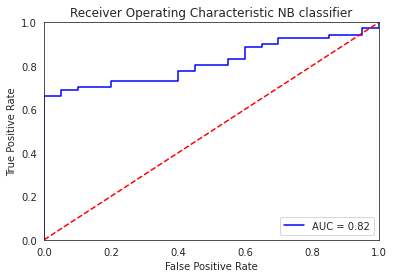

In [44]:
# plot the AUC for Naive Bayesian Classifier
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic NB classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **LOGISTIC** **REGRESSION** **model**

In [45]:
# build the second classifer, logsitic regrssion 
classifier_log =  LogisticRegression().fit(X_train,y_train)

In [46]:
print("Logisitic Accuracy: %.2F"%classifier_log.score(X_test, y_test))
results_log = cross_val_score(classifier_log, X,target, cv=10)


print("\n10-fold cross-validation:")
print(results_log)


print("The average accuracy of the Logisitic classifier is : %.2f" % np.mean(results_log))
print("\nConfusion matrix of the Logisitic classifier:")
predicted_log= classifier_log.predict(X_test)
print(confusion_matrix(y_test,predicted_log))


print("\nClassification_report of Logisitic classifier:")
print(classification_report(y_test,predicted_log))
print("----------------------------------------------------------------------------")

Logisitic Accuracy: 0.78

10-fold cross-validation:
[0.78571429 0.78571429 0.78571429 0.78571429 0.81481481 0.81481481
 0.81481481 0.81481481 0.81481481 0.77777778]
The average accuracy of the Logisitic classifier is : 0.80

Confusion matrix of the Logisitic classifier:
[[ 0 20]
 [ 0 71]]

Classification_report of Logisitic classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.78      1.00      0.88        71

    accuracy                           0.78        91
   macro avg       0.39      0.50      0.44        91
weighted avg       0.61      0.78      0.68        91

----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_log.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

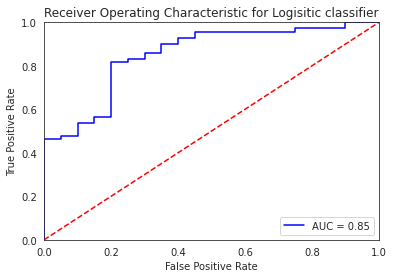

In [48]:
# polt AUC for Logistic Regression
plt.title('Receiver Operating Characteristic for Logisitic classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The comparisons show that both Naive Bayes and Logistic Regression model have a same results based on the different aspects mentioned above.

# **Communicate** **Results**

# **Number** **of** **Tweets** **by** **opinion**

In [49]:
import pandas as pd

import csv
import re # for regular expression
import string
from datetime import datetime

import nltk 
from nltk.tokenize import RegexpTokenizer # devide the words 
from collections import Counter #count the number of word for each list 

import numpy as np 
import matplotlib.pyplot as plt

import seaborn
import plotly.graph_objs as go
import plotly.offline as py

%matplotlib inline

In [50]:
# Q: How many positive, negative, and neutral tweets we have?
tweets_by_sentiment = Data['Sentiment'].value_counts()

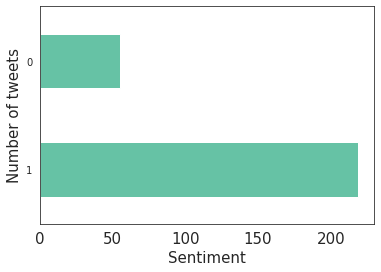

In [51]:
# visualize the results 
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)

tweets_by_sentiment.plot(ax=ax, kind='barh')

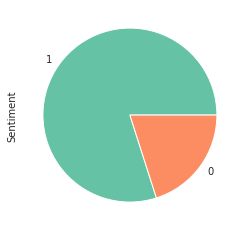

In [52]:
tweets_by_sentiment.plot(kind='pie')

In [53]:
# remove punctuations علامات الترقيم  

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [54]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [55]:
# remove repeated letters
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [56]:
#start processing the tweet
def processPost(tweet):

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)

    #Remove new lines with white space
    tweet = tweet.replace('\n',' ')
    tweet = tweet.replace('\t',' ')
        
    return tweet

In [57]:
# apply the method in all the text and create another cloumn with the processed text
Data["clean text"] = Data['text'].apply(lambda x: processPost(x))

In [58]:
Data.head(2)

,id,@username,display name,text,date,retweets,likes,clean text,tokens,scores,compound,Sentiment
478,1454799825971695617,si12_20,سما لخدمات العمره .. 🌱🕋,لحجز الروضه الشريفه لليوم رجال ونساء حجز فوري...,2021-10-31T13:18:02+00:00,1,0,لحجز الروضه الشريفه ليوم رجال ونساء حجز فوري ح...,"[لحجز, الروضه, الشريفه, ليوم, رجال, ونساء, حجز...","{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.4215,1
481,1454779374000132097,Zowar_,Zowar OTA,"أجواء روحانية تأسر القلوب .. ""Join us"" ( اعت...",2021-10-31T11:56:45+00:00,1,2,اجواء روحانيه تاسر القلوب Join us اعتمرنا,"[اجواء, روحانيه, تاسر, القلوب, Join, us, اعتمرنا]","{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.2960,1


In [59]:
Data.drop_duplicates(subset='clean text',inplace=True)

In [60]:
tokenizer = RegexpTokenizer(r'\w+')
Data["clean text tokens"] = Data["clean text"].apply(tokenizer.tokenize)
Data.head(2)

,id,@username,display name,text,date,retweets,likes,clean text,tokens,scores,compound,Sentiment,clean text tokens
478,1454799825971695617,si12_20,سما لخدمات العمره .. 🌱🕋,لحجز الروضه الشريفه لليوم رجال ونساء حجز فوري...,2021-10-31T13:18:02+00:00,1,0,لحجز الروضه الشريفه ليوم رجال ونساء حجز فوري ح...,"[لحجز, الروضه, الشريفه, ليوم, رجال, ونساء, حجز...","{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.4215,1,"[لحجز, الروضه, الشريفه, ليوم, رجال, ونساء, حجز..."
481,1454779374000132097,Zowar_,Zowar OTA,"أجواء روحانية تأسر القلوب .. ""Join us"" ( اعت...",2021-10-31T11:56:45+00:00,1,2,اجواء روحانيه تاسر القلوب Join us اعتمرنا,"[اجواء, روحانيه, تاسر, القلوب, Join, us, اعتمرنا]","{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.2960,1,"[اجواء, روحانيه, تاسر, القلوب, Join, us, اعتمرنا]"


**Most** **Common** **Words**

In [61]:
ignore = {'', 'في', 'اله', 'RT', 'السلام', 'عليكم', 'و', 'تم', 'عندي', 'انا', 'الي', 'او', 'معنا', 'ان', 'عبر', 'يارب', 'اذا', 'يتم', 'من', 
          'مكن','تطبيق', 'احد', 'اي', 'علي', 'و', 'الي', 'التطبيق', 'ما', 'هل', 'لي', 'لم', 'عن', 'عن', 'ولا', 'مع', 'لا', 'الان',
         'وبركاته', 'ا', 'م', 'كل', 'له', 'لك', 'الا', 'ورحمه', 'يكون', 'بك', 'فيه', 'غير', 'قياس', 'ال', 'الهم', 'معي', 'يا', 'بعد',
         'توكلنا', 'اليوم', 'جميع', 'يوم', 'بنك', 'لكن', 'نور', 'الحمدله', 'الحمد', 'هذا', 'ايش', 'وش', 'يعني', 'قبل', 'انه', 'بشكل','مطار','تخفيض',
         'ل', 'شي', 'اني', 'ف', 'ب' ,'تغير', 'مو', 'حتي', 'وانا', 'لو', 'التحصيلي', 'اخذ', 'كذا', 'يطلع', 'ايام', 'بس', 'عشان', 'الع','My' ,'after','JedahMadina','take','We','You','hey','or','am','receive','Umrah','الفنادق',  
         'متي', 'مره', 'فقط', 'كنت', 'عند', 'ولم', 'لان', 'كم',
         'the','to','you','and','for','is','my','I','of','of','have','in','from','wil',
          'a','Haj','not','number','permit','me','please','on','Please','gt','can','i','does','dose',
          'provide','be','it','received','Karwa','safe','ride','toward','no','width','with','refund','this','as',
          'اعتمرنا','are','but','that','by','us','your','if','we','was','there','what','Airport','International', 
          'الفنادق', 'جده', 'مجانا' ,'واحدث', 'الموديلات', 'بجميع', 'انواع','السيارات', 'they','know','one','2','want','النقل','الحرم','mesage','wife','143','any','got','our','al','the','has'
          }

In [62]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
# remove Arabic stop words from the tweets
for word in Data['text']:
    if word in en_stops:        
        words_filtered.remove(word)

In [64]:
# remove words that is in the ignore list
all_words = [word for tokens in Data["clean text tokens"] for word in tokens if not word in ignore]

sentence_lengths = [len(tokens) for tokens in Data["clean text tokens"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

3356 words total, with a vocabulary size of 1542
Max sentence length is 59


In [65]:
# count the number of words
word_counter = Counter(all_words)
# show the most common words
word_counter.most_common(50)

[('عمره', 58),
 ('حجز', 42),
 ('توصيل', 29),
 ('حجوزات', 23),
 ('haj', 20),
 ('help', 19),
 ('Thank', 18),
 ('reservation', 18),
 ('update', 17),
 ('cancel', 16),
 ('مكه', 15),
 ('رحلتك', 15),
 ('لحرم', 15),
 ('التذاكر', 14),
 ('تذاكر', 14),
 ('stil', 14),
 ('status', 14),
 ('Kindly', 13),
 ('اخر', 12),
 ('Makah', 11),
 ('اعدادات', 11),
 ('استفسار', 11),
 ('boking', 11),
 ('pay', 10),
 ('reply', 10),
 ('days', 10),
 ('how', 10),
 ('paid', 10),
 ('reference', 10),
 ('الانتظار', 9),
 ('اهلا', 9),
 ('خدمات', 9),
 ('pilgrim', 9),
 ('vacine', 9),
 ('How', 9),
 ('isue', 9),
 ('already', 9),
 ('now', 9),
 ('The', 8),
 ('Dear', 8),
 ('ben', 8),
 ('enter', 8),
 ('which', 8),
 ('so', 8),
 ('do', 8),
 ('amount', 8),
 ('What', 8),
 ('other', 8),
 ('2nd', 8),
 ('package', 8)]

In [66]:
# Display 10 least common lines
word_counter.most_common()[-10:]

[('couldnt', 1),
 ('ادخلي', 1),
 ('وحطي', 1),
 ('ويضبط', 1),
 ('otp', 1),
 ('By', 1),
 ('USA', 1),
 ('based', 1),
 ('lok', 1),
 ('advance', 1)]

In [67]:
for_df=Data[Data["Sentiment"]==1]
For_words = [ word for tokens in for_df["clean text tokens"] for word in tokens if not word in ignore]
for_word_counter = Counter(For_words)
for_word_counter.most_common(30)

[('عمره', 58),
 ('حجز', 42),
 ('توصيل', 29),
 ('حجوزات', 23),
 ('Thank', 18),
 ('help', 18),
 ('haj', 16),
 ('مكه', 15),
 ('رحلتك', 15),
 ('لحرم', 15),
 ('التذاكر', 14),
 ('تذاكر', 14),
 ('update', 14),
 ('Kindly', 13),
 ('Makah', 11),
 ('اعدادات', 11),
 ('اخر', 11),
 ('استفسار', 10),
 ('reply', 10),
 ('reservation', 10),
 ('الانتظار', 9),
 ('اهلا', 9),
 ('cancel', 9),
 ('stil', 8),
 ('days', 8),
 ('status', 8),
 ('reference', 8),
 ('العمره', 7),
 ('amp', 7),
 ('كلمه', 7)]

In [68]:
for_df=Data[Data["Sentiment"]==0]
For_words = [ word for tokens in for_df["clean text tokens"] for word in tokens if not word in ignore]
for_word_counter = Counter(For_words)
for_word_counter.most_common(30)

[('reservation', 8),
 ('cancel', 7),
 ('pay', 6),
 ('status', 6),
 ('There', 6),
 ('boking', 6),
 ('problem', 6),
 ('stil', 6),
 ('infected', 5),
 ('2nd', 5),
 ('How', 5),
 ('service', 4),
 ('amount', 4),
 ('haj', 4),
 ('package', 4),
 ('12', 4),
 ('how', 4),
 ('available', 4),
 ('yet', 4),
 ('already', 4),
 ('an', 4),
 ('SMS', 4),
 ('paid', 4),
 ('now', 4),
 ('What', 4),
 ('خدمات', 3),
 ('which', 3),
 ('due', 3),
 ('tickets', 3),
 ('were', 3)]

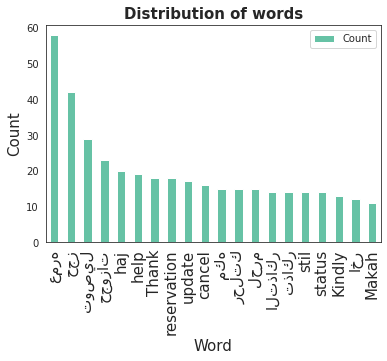

In [69]:
# store the top 20 words in a new data frame
lst = word_counter.most_common(20)
word_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
word_df.head()
word_df.set_index('Word', inplace=True)
# visualize the top 20 words

fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15,rotation=45)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Word', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Distribution of words', fontsize=15, fontweight='bold')

word_df.plot(ax=ax, kind='bar')

# **Tweets** **Distribution** **Per** **Week**

In [70]:
#first, we need to convert the date column to a datetime object
Data['date'] = Data['date'].astype('datetime64[ns]')

In [71]:
#creat a new data frame
Date_df4= Data[['date','text','Sentiment']].copy()

In [72]:
# create a new column for dates
Date_df4['date'] = Date_df4['date'].dt.date

In [73]:
df_by_date = Date_df4.groupby('date').count()

In [74]:
df_by_date.tail()

,text,Sentiment
date,,
2021-10-19,5,5
2021-10-24,1,1
2021-10-27,1,1
2021-10-31,2,2
2021-11-03,1,1


In [75]:
# make the date as the index for the visualization 
df_by_date['date'] = df_by_date.index

In [76]:
data = [go.Scatter(x=df_by_date['date'], y=df_by_date['text'])]

py.iplot(data)

# **After** **visualizing** **the** **data** **that**  **collected**, **findings**  **the** **following**:
 
•	Positive opinion tweets are more than negative opinion tweets.
•	The order of tweets number from bigger to smaller based on tweets semantic are neutral then positive followed by negative.
•	The tweets distribution per week starts increasing from  june till  jul then tweets start decreasing.


**At** **the** **end** **analysis** **project** **and** **regarding** **the** **visualization** **phase** **proved** **the** **following**:
 

*   From the output of negative  common words used in tweets proved the “there is a problem related to registration process” 
by these words: (cancel، ، How، problem).
*   From the output of positive common words used in tweets, proved the  “the application’s customer services team high responsiveness” by these words: ('Thank، اهلا، حجز )


